# Seaborn

<img src='https://raw.githubusercontent.com/mwaskom/seaborn/master/doc/_static/logo-wide-lightbg.svg'>


### 설치

pip 환경

```sh
(env)$ pip install seaborn
```

conda

```sh
(base)$ conda install seaborn
```

# 주요 설치 정보

    Mac이나 Windows에서 확인 

In [1]:
import matplotlib
print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

버전:  3.6.2
설치위치:  C:\Users\GM220808\.venv\Practice1\lib\site-packages\matplotlib\__init__.py
설정:  C:\Users\GM220808\.matplotlib
캐시:  C:\Users\GM220808\.matplotlib


In [2]:
import seaborn

print ('버전: ', seaborn.__version__)
print ('설치위치: ',seaborn.__file__)

버전:  0.12.1
설치위치:  C:\Users\GM220808\.venv\Practice1\lib\site-packages\seaborn\__init__.py


### 그리드와 그래프 사이즈 지정

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

### 한글 폰트 전체 반영 

Text(0.5, 1.0, '한글 타이틀...')

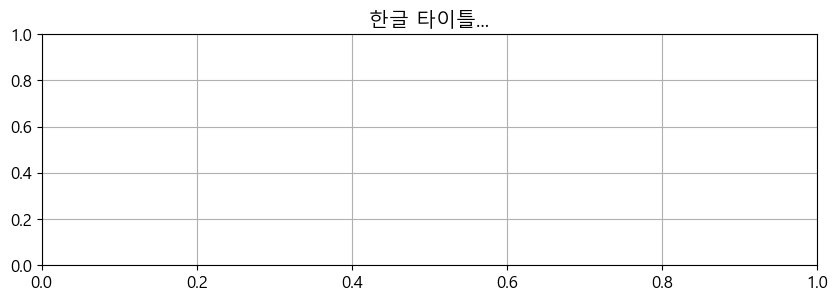

In [4]:
# 전역 폰트 설정 사용
font_path = 'C:/Windows/Fonts/Malgun.ttf'
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
# plt.rc('font', family=fontname)
plt.rcParams["font.family"] = fontname
plt.rcParams["font.size"] = 12

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

### seaborn 데이터를 로드하기

데이터를 로딩하면 pandas의 데이터프레임으로 처리함 

In [5]:
import seaborn as sns

In [6]:
tips = sns.load_dataset("tips")

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. 히스토그램 그리기

displot 메서드를 사용하면 히스토그램과 밀집도 그래프를 같이 그립니다.

### 히스토그램/밀집도

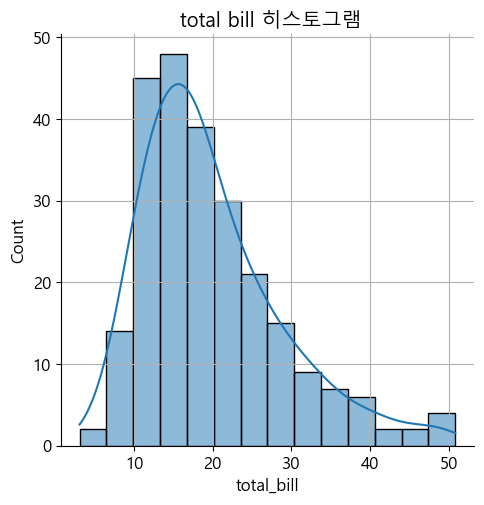

In [8]:
sns.displot(data=tips, x='total_bill', kde=True)

plt.title(" total bill 히스토그램")
plt.show()


#### ~distplot()~ : deprecated

Seaborn의 distplot 명령은 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용된다.
- distplot: http://seaborn.pydata.org/generated/seaborn.distplot.html

> seaborn 0.11.1 이후 `distplot()` 은 deprecated 상태이다.

```python
x = iris.petal_length.values
sns.set_style("whitegrid")
sns.distplot(x, kde=True, rug=True)
plt.title("Iris의 꽃잎 길이 Dist plot")
```

 밀집도 그래프를 제외하고 싶다면 kde 인잣값을 False로 설정하면 됩니다.

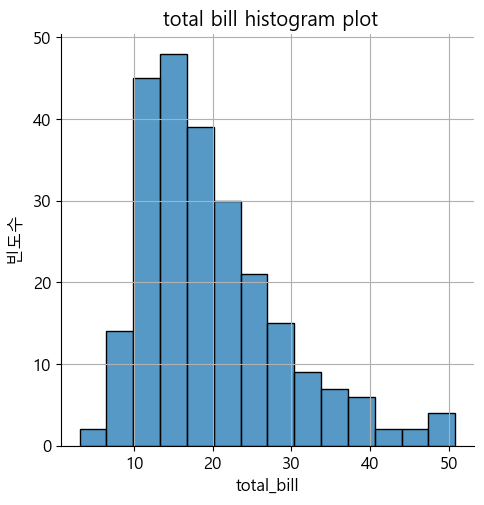

In [9]:
sns.displot(data=tips, x='total_bill', kde=False)
plt.title(" total bill histogram plot")
plt.ylabel(" 빈도수 ")
plt.show()

In [ ]:
# ax1 = sns.distplot(tips['total_bill'],kde=False)
# ax1.set_title(" total bill histogram plot")
# ax1.set_ylabel(" Tip ")

### 이산 값을 처리하는 그래프

count 그래프는 이산값을 나타낸 그래프입니다. 다음은 countplot 메서드에 tips 데이터프레임의 day열 데이터를 넣어 count 그래프를 그린 것입니다.

In [10]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

x 축 값이 자동으로 세팅됨

Text(0, 0.5, 'Frequency')

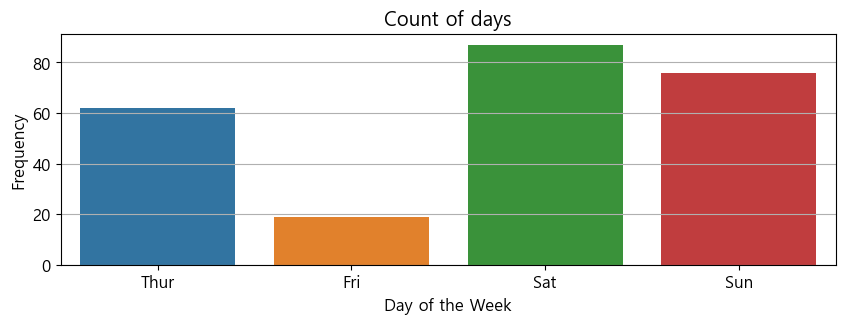

In [11]:
ax = plt.subplots()
ax = sns.countplot(x='day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

## 2. 밀집Density 그래프
 - Figure Level: displot
 - Axes level: kdeplot,

### 밀집도 그래프

distplot 의 kind를 kde로 주면 밀집도 그래프만 그려준다.

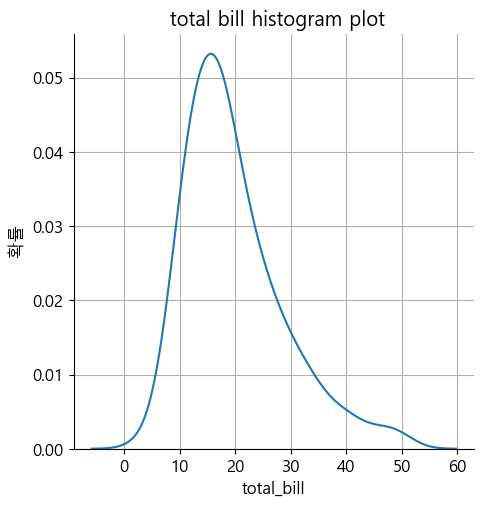

In [12]:
sns.displot(data=tips, x='total_bill', kind='kde')
plt.title(" total bill histogram plot")
plt.ylabel(" 확률 ")
plt.show()

# ax1 = sns.distplot(tips['total_bill'],hist=False)
# ax1.set_title(" total bill histogram plot")
# ax1.set_ylabel(" 확률 ")
# plt.show()

### 히스토그램/밀집도/러그


히스토그램과 밀집도를 그리는 displot 메서드에 rug 인자를 추가하여 양탄자(rug) 그래프까지 그린 것입니다.

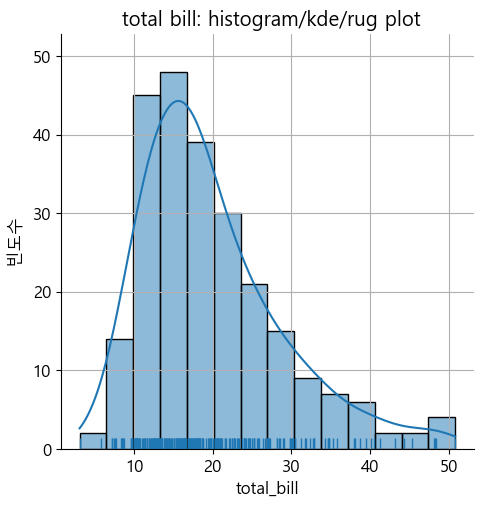

In [13]:
sns.displot(data=tips, x='total_bill', kde=True, rug=True)
plt.title(" total bill: histogram/kde/rug plot")
plt.ylabel(" 빈도수 ")
plt.show()

# ax1 = sns.distplot(tips['total_bill'],rug=True)
# ax1.set_title(" total bill histogram plot")

plt.show()

### Axes level 로 그리기

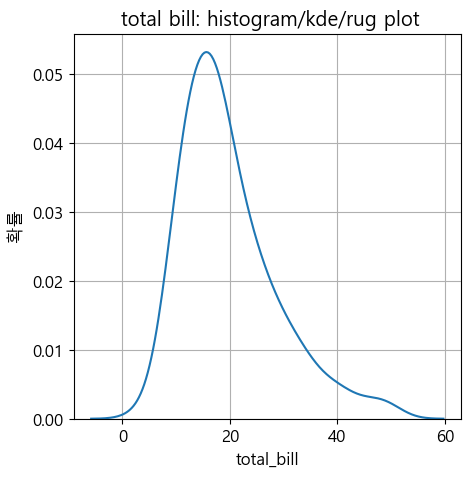

In [14]:
plt.figure(figsize=(5,5))
ax = sns.kdeplot(x=tips['total_bill'])
plt.title(" total bill: histogram/kde/rug plot")
plt.ylabel(" 확률 ")
plt.show()

# ax1 = sns.distplot(tips['total_bill'],rug=True)
# ax1.set_title(" total bill histogram plot")

plt.show()

### 밀집 공간

displot 의 kde 곡선을 밀집면으로 그려줄 수 있다. kdeplot 의 shade 인자를 사용한다.

C:\Users\GM220808\AppData\Local\Temp\ipykernel_7068\261264993.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=tips['total_bill'], y=tips['tip'],shade=True)


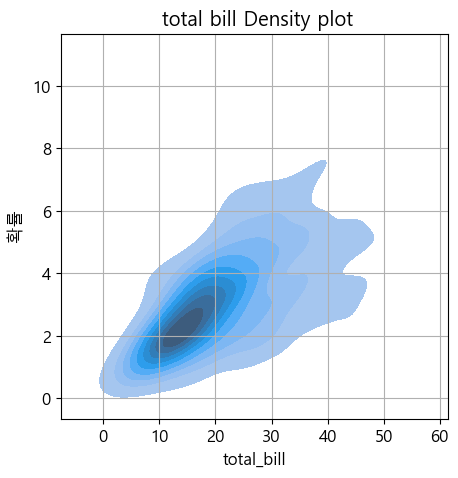

In [15]:
plt.figure(figsize=(5,5))
sns.kdeplot(x=tips['total_bill'], y=tips['tip'],shade=True)
plt.title(" total bill Density plot")
plt.ylabel(" 확률 ")
plt.show()

plt.show()

## 3.  바그래프(평균 표시)

바 그래프는 지정한 변수의 평균을 계산하여 그릴 수 있습니다. 다음은 시간에 따라 지불한 비용의 평균을 바 그래프로 나타낸 것입니다.

### barplot

Text(0.5, 1.0, ' 평균을 계산해서 그래프에 표시')

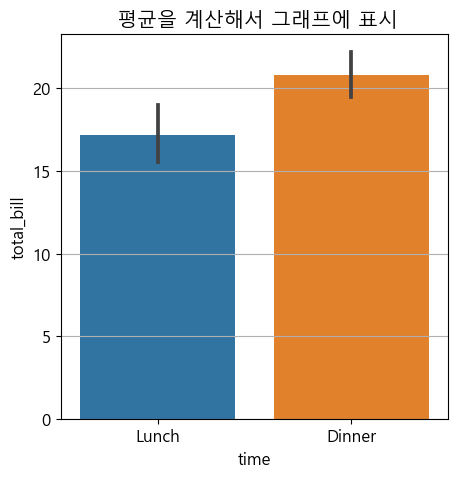

In [16]:
plt.figure(figsize=(5,5))
ax5 = sns.barplot(x='time', y='total_bill', data=tips)
ax5.set_title(" 평균을 계산해서 그래프에 표시")

### Figure level : catplot

Text(0.5, 1.0, ' 평균을 계산해서 그래프에 표시')

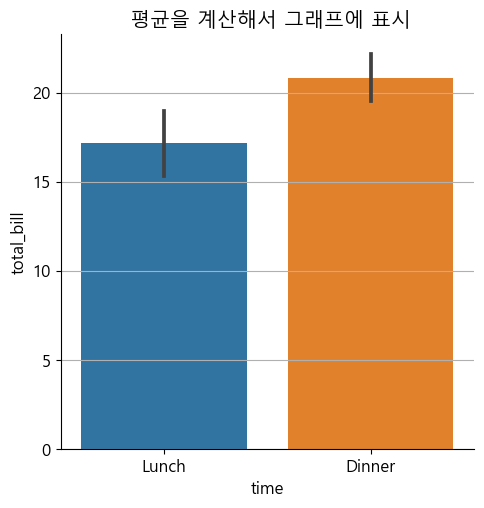

In [17]:
sns.catplot(x='time', y='total_bill', data=tips, kind='bar')
plt.title(" 평균을 계산해서 그래프에 표시")

### catplot 이용 그루핑

범주에 따라 bar 그래프를 그릴 수 있다.


In [18]:
titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


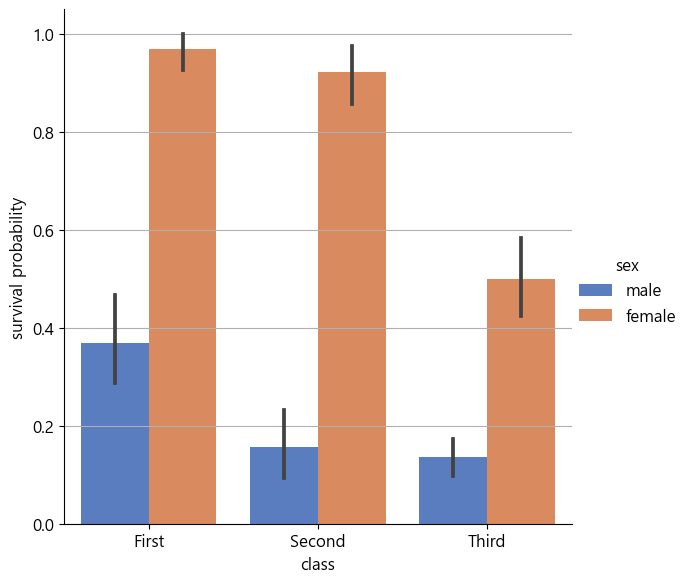

In [19]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.set_ylabels("survival probability")

## 4.  박스 그래프

박스 그래프는 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 다양한 통계량을 한 번에 표현하는 그래프 입니다.

###  박스그래프 하나만 그리기 

<AxesSubplot: ylabel='sepal_length'>

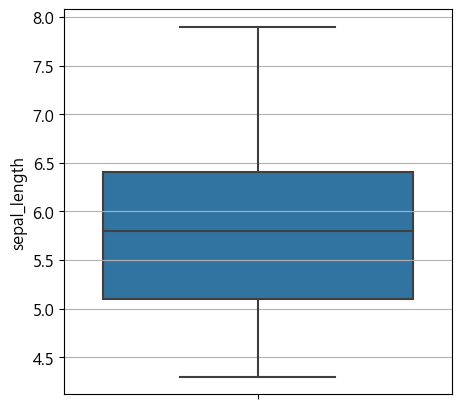

In [20]:
plt.figure(figsize=(5,5))

df = sns.load_dataset('iris')
 
# Make boxplot for one group only
sns.boxplot( y=df["sepal_length"] )
#sns.plt.show()


### 두 개의 박스 그래프

Text(0.5, 1.0, ' 점심과 저녁 금액 차이 ')

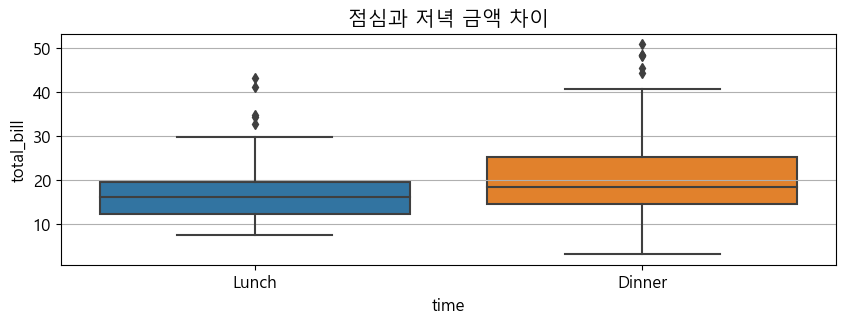

In [21]:
ax4 = sns.boxplot(x='time', y='total_bill', data=tips)
ax4.set_title(" 점심과 저녁 금액 차이 ")

Text(0.5, 1.0, ' 세개의 박스그래프 그리기 ')

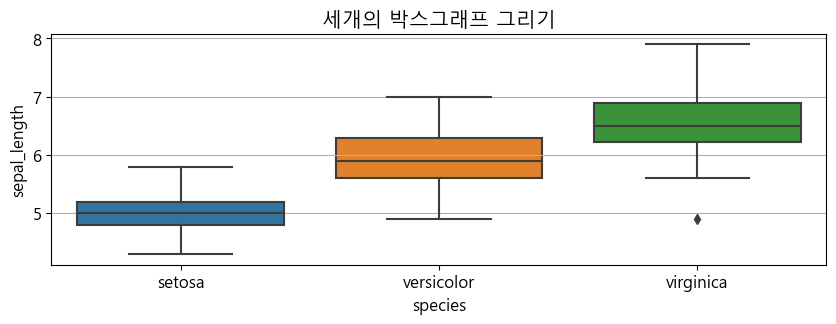

In [22]:
ax5 = sns.boxplot( x=df["species"], y=df["sepal_length"] )
ax5.set_title(" 세개의 박스그래프 그리기 ")

## 4. 바이올린 그래프

박스 그래프는 다양한 통계 수치를 확인하기 위해 자주 사용하는 그래프지만 데이터 분산이 모호하게 표현됩니다. 이런 경우에는 박스 그래프에 커널 밀도를 추정한 바이올린 그래프를 사용하면 됩니다. 쉽게 말해 과정 6의 박스 형태를 바이올린 형태로 바꾸면 바이올린 그래프가 됩니다. 바이올린 그래프는 violinplot 메서드를 사용하여 그릴 수 있습니다.

커널밀도를 표시한 막대그래프로 

Text(0.5, 1.0, ' 바이올린 그래프에 표시')

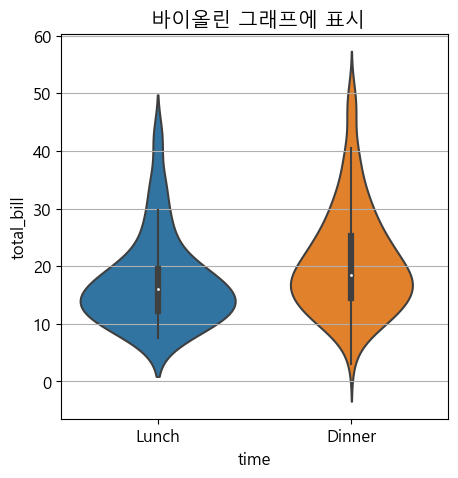

In [24]:
plt.figure(figsize=(5,5))
ax6 = sns.violinplot(x='time', y='total_bill', data=tips)
ax6.set_title(" 바이올린 그래프에 표시")

Text(0.5, 1.0, ' 바이올린 그래프에 표시')

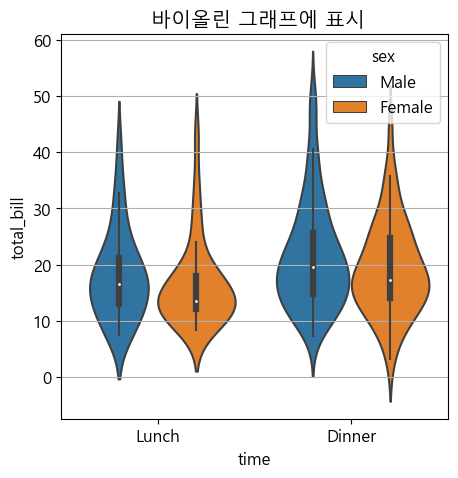

In [25]:
plt.figure(figsize=(5,5))
ax6 = sns.violinplot(x='time', y='total_bill', data=tips, hue='sex')
ax6.set_title(" 바이올린 그래프에 표시")

Text(0.5, 1.0, ' 바이올린 그래프에 표시')

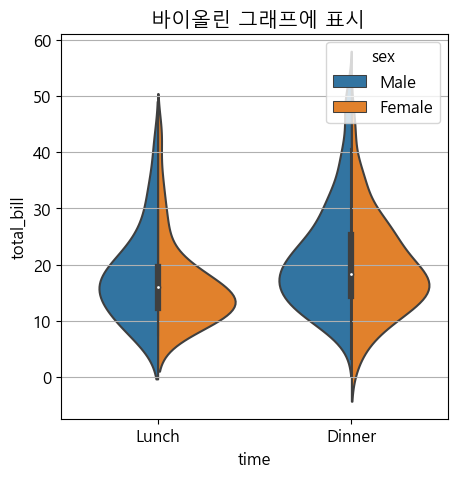

In [26]:
plt.figure(figsize=(5,5))
ax6 = sns.violinplot(x='time', y='total_bill', data=tips, hue='sex', split=True)
ax6.set_title(" 바이올린 그래프에 표시")

## 5. 회귀분석 그래프 regplot

이변량의 산점도와 회귀선을 그리는 regplot, lmplot 



### Axes level 회귀/산점도 그래프 regplot


`regplot` 메서드를 사용하면 산점도 그래프와 회귀선을 함께 그릴수 있습니다. 만약 회귀선을 제거하려면 fit_reg 인자를 False로 지정하면 됩니다.

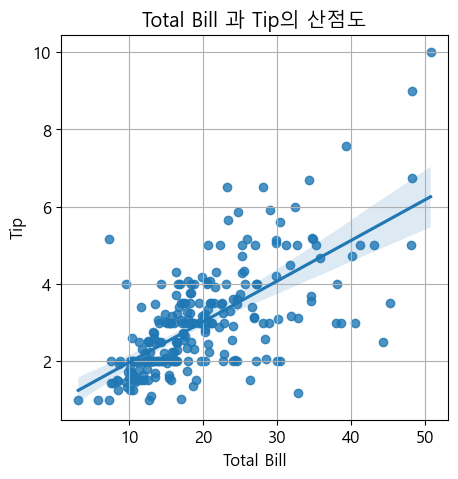

In [27]:
plt.figure(figsize=(5,5))
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Total Bill 과 Tip의 산점도') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')
plt.show()

만약 회귀선을 제거하려면 fit_reg 인자를 False로 지정하면 됩니다.

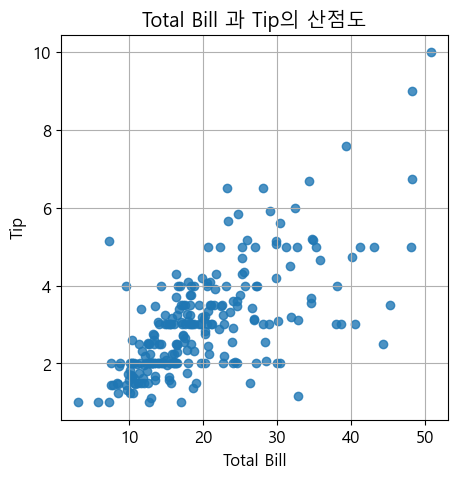

In [28]:
plt.figure(figsize=(5,5))
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) 
ax.set_title('Total Bill 과 Tip의 산점도') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')
plt.show()

### Figure level 회귀 그래프: lmplot



<Figure size 500x500 with 0 Axes>

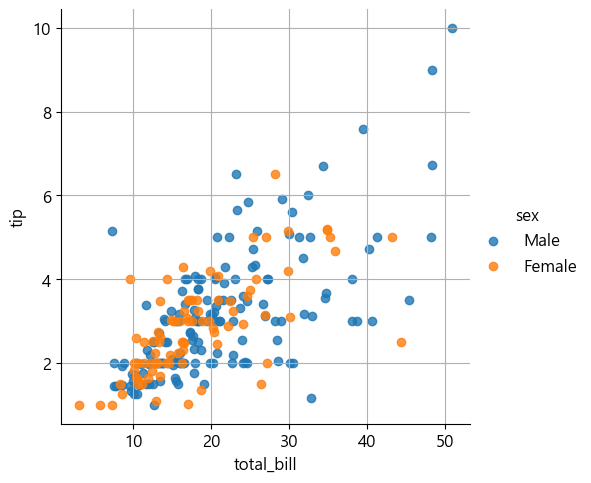

In [29]:
plt.figure(figsize=(5,5))
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False) 
plt.show()

#### markers 인자 이용

<Figure size 500x500 with 0 Axes>

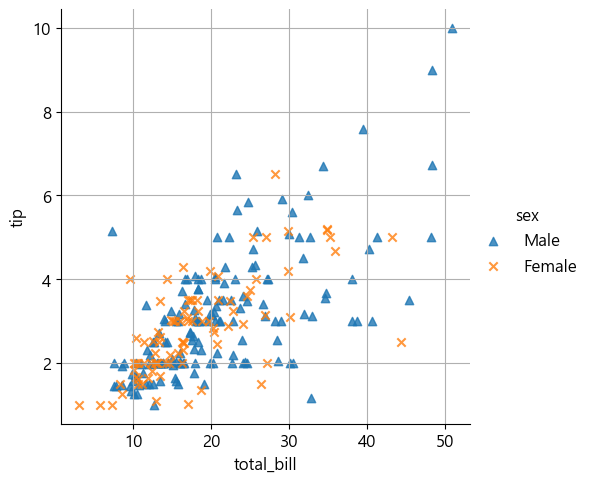

In [30]:
plt.figure(figsize=(5,5))
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False,
                    markers=['^','x']) 
plt.show()

### 범주형 그리기

데이터 프레임의 범주형 특성을 산점도로 그리면 해당 범주형 레이블이 한꺼번에 산점도 그래프로 그려진다.

In [31]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [32]:
anscombe.dataset.value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

범주형의 레이블 별로 그래프를 나누어 그리려면 어떻게 해야 할까요?

그룹별로 그래프를 나누어 그리려면 lmplot 메서드에 추가로 col과 col_wrap 인자를 설정해야 합니다. col_wrap 인자에는 그래프를 그릴 열의 최댓값을 지정하고 col 인자에는 데이터 그룹을 구분할 열(dataset)을 지정했습니다.

<Figure size 500x500 with 0 Axes>

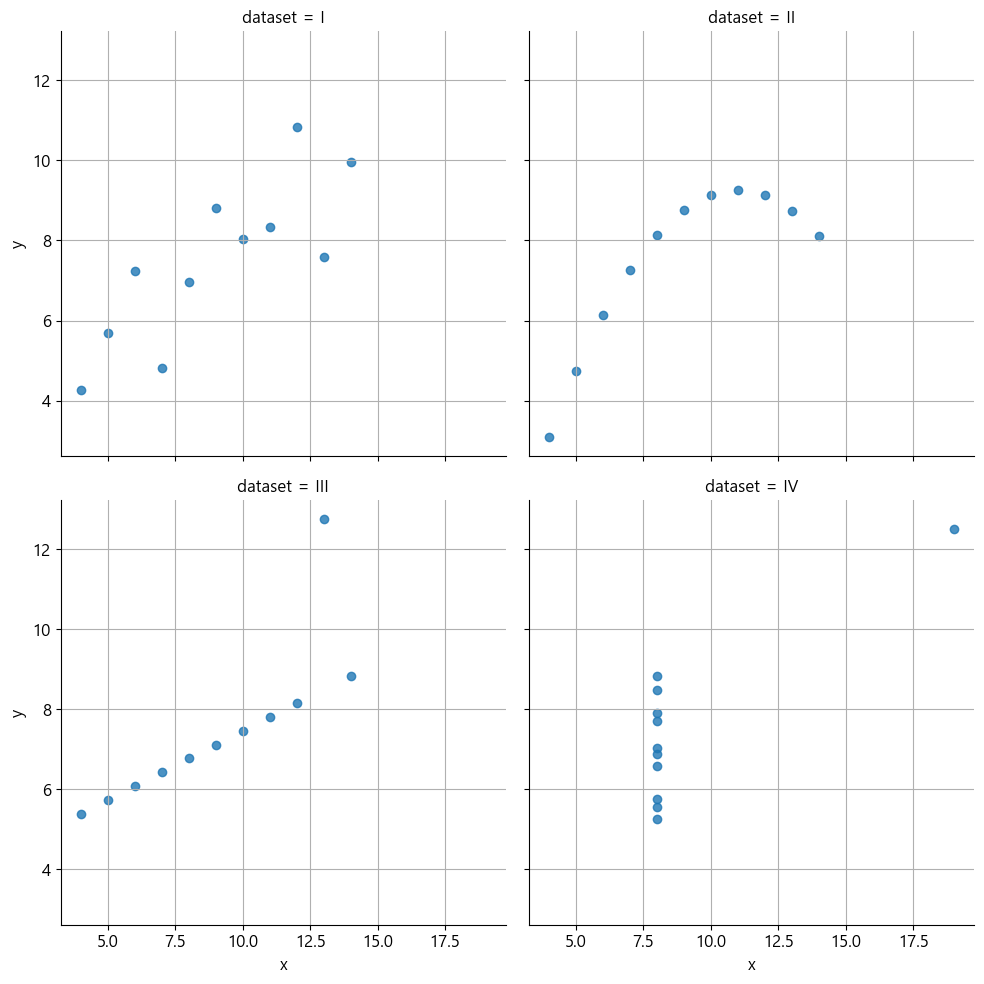

In [33]:
plt.figure(figsize=(5,5))
scatter = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                           col='dataset', col_wrap=2)

## 6. joinplot : 산점도+히스토그램

산점도 그래프와 히스토그램을 한 번에 그려주는 joinplot 메서드를 사용해 보겠습니다.

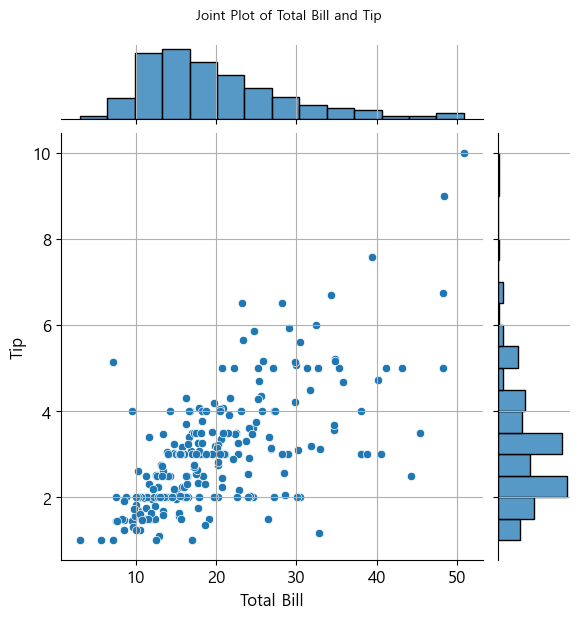

In [34]:
ax = sns.jointplot(x='total_bill', y='tip', data=tips)
ax.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
ax.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)
plt.show()

산점도 그래프는 점이 겹처 보일 경우 점을 구분하기 어렵다는 단점이 있습니다. 만약 산점도 그래프의 데이터를 구분하기 쉽게 그리고 싶다면 육각 그래프(hexbin)를 사용하면 됩니다. 육각 그래프는 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프입니다. 그래서 특정 데이터의 개수가 많아지면 점점 진한 색으로 표현됩니다. 육각 그래프는 과정 2에서 사용한 jointplot 메서드를 그래도 사용합니다. 대신 Kind 인잣값을 hex로 지정하면 됩니다.

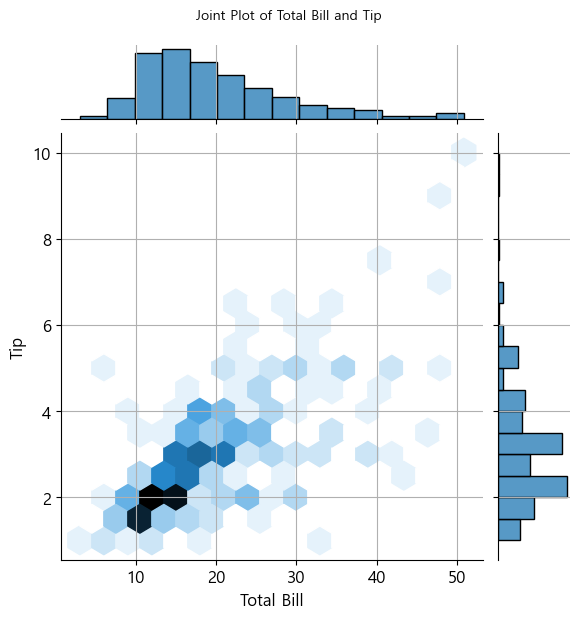

In [35]:
ax = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
ax.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
ax.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)
plt.show()

In [ ]:
iris = sns.load_dataset("iris")

In [ ]:

joint = sns.jointplot("petal_length", "sepal_length", data=iris,
                          marginal_kws=dict(bins=15, rug=True),
                       annot_kws=dict(stat="r"),
                        s=40, edgecolor="w", linewidth=1)

joint.set_axis_labels(xlabel='petal_length', ylabel="sepal_length")
joint.fig.suptitle('Joint Plot of iris', fontsize=10, y=1.03)

TypeError: jointplot() got multiple values for argument 'data'

##  7. 관계 그래프 그리기

관계 그래프는 지금까지 설명한 그래프를 종합한 그래프라고 생각하면 됩니다. 관계 그래프는 pairplot 메서드에 데이터프레임을 넣는 방법으로 간단하게 그릴 수 있습니다.

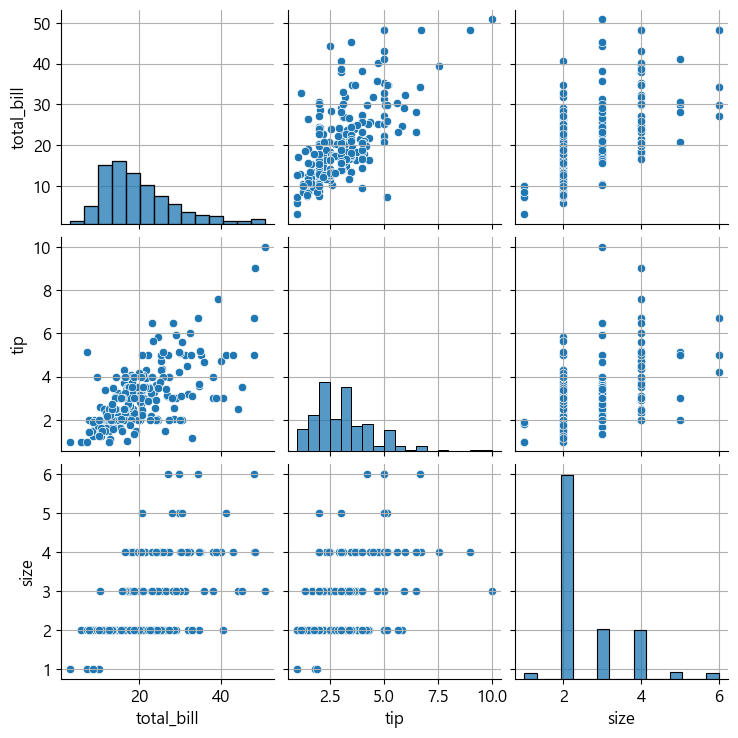

In [38]:
sns.pairplot(tips)

특성 그룹으로 관계 그래프 그리기

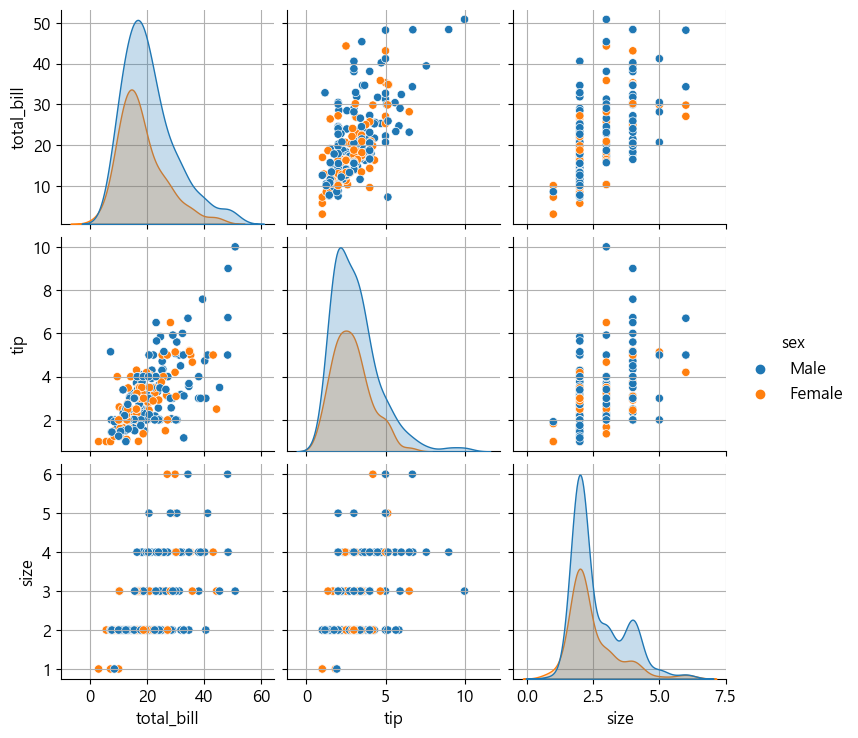

In [39]:
fig = sns.pairplot(tips, hue='sex')

### pairgrid 이용 중복 배제

PairGrid는 그래프가 그려지는 위치를 직접 지정하여 원하는 그래프로 그려진다. 
 - map_upper 메서드는 대각선을 기준으로 위쪽에 그릴 그래프를 지정합니다. 
 - 반대로 map_lower 메서드는 대각선을 기준으로 아래쪽에 그릴 그래프를 지정합니다. 
 - map_diag는 대각선 중심으로 그래프를 그립니다. 
 
다음은 이차원 밀집도를 대각선 기준으로 아래쪽에, 산점도 그래프는 대각선 기준으로 위쪽에 그런 것입니다. 히스토 그램과 밀집도는 대각선을 중심으로 그려집니다.

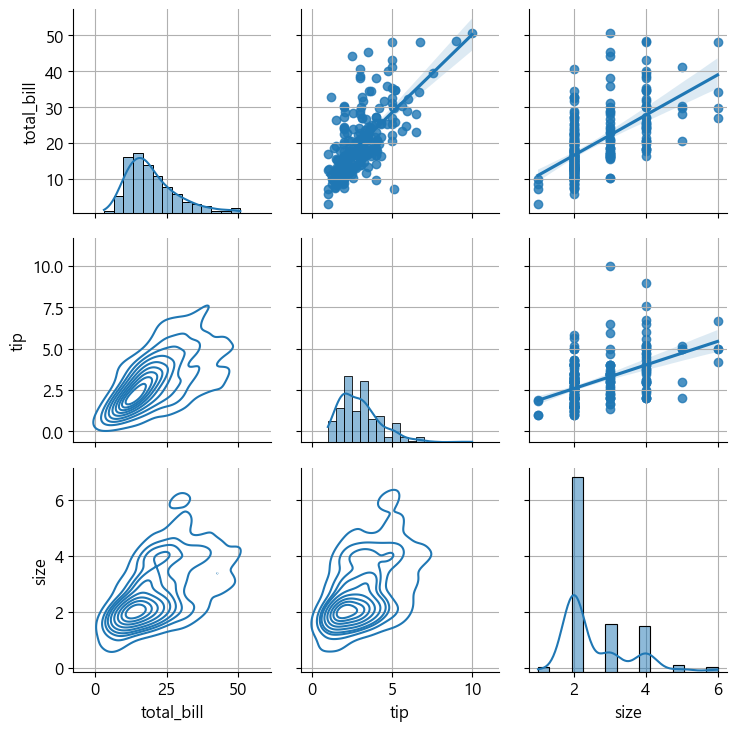

In [40]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.histplot, kde=True)
plt.show()

## Figure level과 Axes level 그래프

- https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions
- https://stackoverflow.com/questions/63895392/seaborn-is-not-plotting-within-defined-subplots

Axes 레벨
 - seaborn 함수에서 반환하는 matplotlib.pyplot.Axes 에 그래프를 그린다.
 - ~~distplot~~, histplot, kdeplot 등

Figure 레벨
 - Seborn 의 FacetGrid 를 통해서 그린다.
 - relplot, displot, catplot 상위 FaceGrid 모듈은 하위에 다양한 단일 Axes-level의 함수를 지원한다.

<img src='https://seaborn.pydata.org/_images/function_overview_8_0.png' width='600'>

### Axes Level Plot

`histplot`, `kdeplot`, `rugplot` 등...

In [41]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


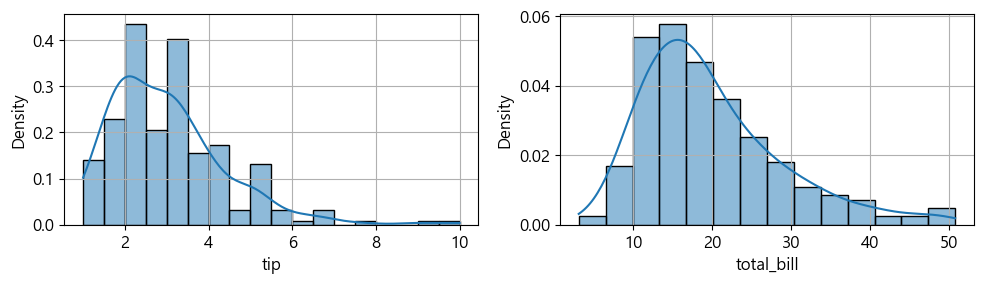

In [42]:
# select the columns to be plotted
cols = ['tip', 'total_bill']

# create the figure and axes
fig, axes = plt.subplots(1, 2)
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=tips[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

### Figure Level

In [43]:
# create a long dataframe
df1 = tips.melt(id_vars='sex', value_vars=['tip', 'total_bill'], var_name='bill_size', value_name='vals')
df1

,sex,bill_size,vals
0,Female,tip,1.01
1,Male,tip,1.66
2,Male,tip,3.50
3,Male,tip,3.31
4,Female,tip,3.61
...,...,...,...
483,Male,total_bill,29.03
484,Female,total_bill,27.18
485,Male,total_bill,22.67
486,Male,total_bill,17.82


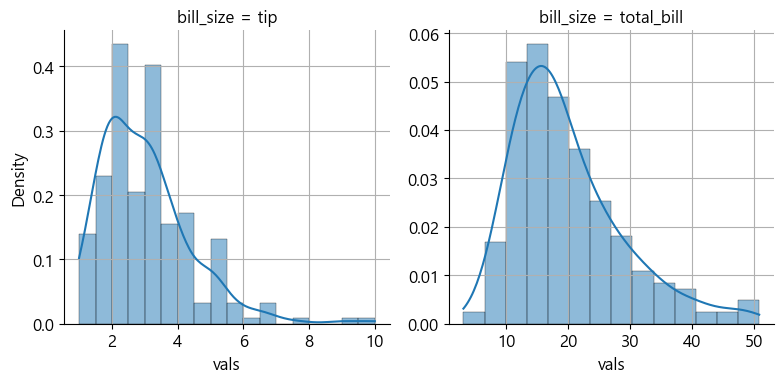

In [45]:
# plot
sns.displot(data=df1, x='vals', col='bill_size', kde=True, stat='density', 
            common_bins=False, common_norm=False, height=4, 
            facet_kws={'sharey': False, 'sharex': False})